<a href="https://colab.research.google.com/github/Atharvaajain/DL_MODELS/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers,models,callbacks

In [3]:
(train_images,train_lables),(test_images,test_lables) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
model = models.Sequential([layers.Conv2D(64,(3,3),activation = 'relu',input_shape=(32,32,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(32,(3,3),activation = 'relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(32,(3,3),activation = 'relu'),
                           layers.Flatten(),
                           layers.Dense(128,activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
                          ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [6]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [7]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [8]:
history = model.fit(train_images,train_lables,epochs = 50, validation_split = 0.2, batch_size=64)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 109ms/step - accuracy: 0.1359 - loss: 3.4511 - val_accuracy: 0.2534 - val_loss: 1.9435
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.2777 - loss: 1.9020 - val_accuracy: 0.3144 - val_loss: 1.8583
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.3653 - loss: 1.7117 - val_accuracy: 0.4362 - val_loss: 1.5591
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.4725 - loss: 1.4423 - val_accuracy: 0.5205 - val_loss: 1.3569
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.5387 - loss: 1.2946 - val_accuracy: 0.5581 - val_loss: 1.2577
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.5840 - loss: 1.1726 - val_accuracy: 0.5710 - val_loss: 1.2211
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 108ms/step - accuracy: 0.6154 - loss: 1.0779 - val_accuracy: 0.5969 - val_loss: 1.1730
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.6423 - loss: 1

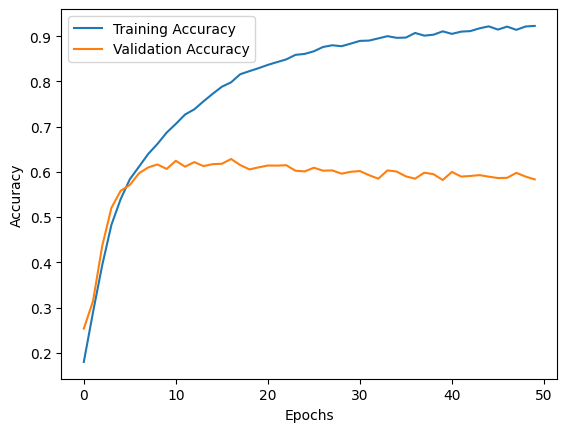

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_lables)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5701 - loss: 3.6597
0.5723000168800354


In [12]:
pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
